# DMT-Assignment01-Task01-Preprocess

## Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
plt.style.use("ggplot")
%matplotlib inline

In [2]:
# read data from file
dataset = pd.read_csv("dataset_mood_smartphone.csv")
dataset

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...,...
376907,2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [3]:
# because "Unnamed" seems useless, get rid of it from dataset
dataset = dataset.drop("Unnamed: 0", 1)
dataset

,id,time,variable,value
0,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...
376907,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


Text(0, 0.5, 'Data points')

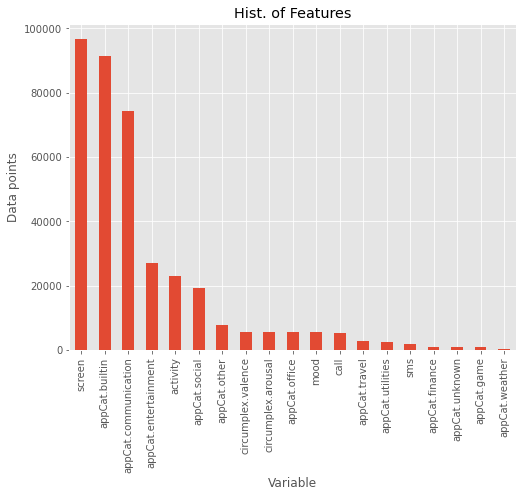

In [4]:
# visualized the dataset by counting variables
hist = pd.DataFrame(dataset.variable.value_counts()).plot(kind='bar', title="Hist. of Features", \
                                                       legend=None, figsize=(8,6))
hist.set_xlabel("Variable")
hist.set_ylabel("Data points")

In [5]:
# label ids
ids = dataset.id.unique()
ids

array(['AS14.01', 'AS14.02', 'AS14.03', 'AS14.05', 'AS14.06', 'AS14.07',
       'AS14.08', 'AS14.09', 'AS14.12', 'AS14.13', 'AS14.14', 'AS14.15',
       'AS14.16', 'AS14.17', 'AS14.19', 'AS14.20', 'AS14.23', 'AS14.24',
       'AS14.25', 'AS14.26', 'AS14.27', 'AS14.28', 'AS14.29', 'AS14.30',
       'AS14.31', 'AS14.32', 'AS14.33'], dtype=object)

Text(0, 0.5, 'Data points')

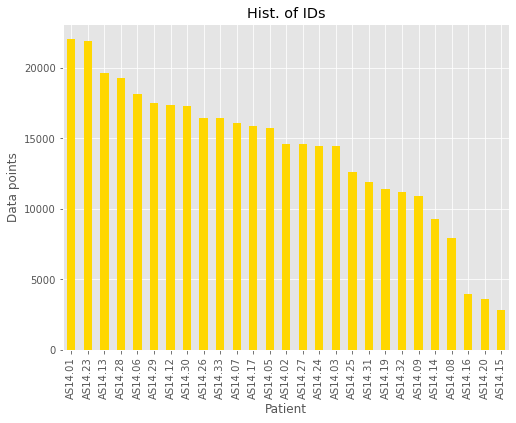

In [6]:
# visualized dataset by counting ids
hist2 = pd.DataFrame(dataset.id.value_counts()).plot(kind="bar", title="Hist. of IDs", \
                                                     legend=None, figsize=(8,6) ,color="gold")
hist2.set_xlabel("Patient")
hist2.set_ylabel("Data points")

In [7]:
# label time
dataset["time"] = pd.to_datetime(dataset["time"])
dataset["time"] = dataset["time"].dt.normalize()
dataset.time

0        2014-02-26
1        2014-02-26
2        2014-02-26
3        2014-02-26
4        2014-02-27
            ...    
376907   2014-04-11
376908   2014-04-19
376909   2014-04-26
376910   2014-04-27
376911   2014-04-07
Name: time, Length: 376912, dtype: datetime64[ns]

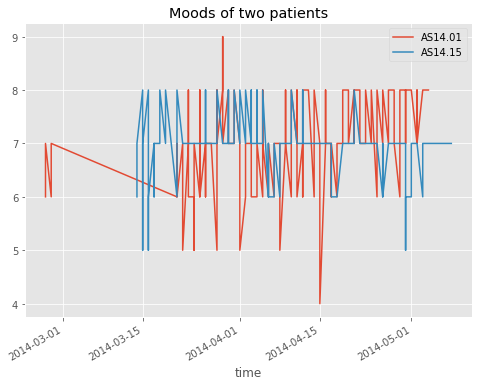

In [8]:
# visualized two patients' mood over time
fig, ax = plt.subplots()
for f, a in dataset[(dataset.id.isin(["AS14.01","AS14.15"])) \
                    & (dataset.variable=="mood")].groupby(["id"]):
    ax = a.plot(ax=ax, kind="line", x="time", y="value", label=f, \
                title="Moods of two patients", figsize=(8,6))
plt.show()

## Preprocessing

In [19]:
# create an empty dataset which is labeled by ID and time
prodataset = dataset.pivot_table(index=["id","time"], columns="variable",values="value")
prodataset.isnull().sum()

variable
activity                 785
appCat.builtin           778
appCat.communication     790
appCat.entertainment    1123
appCat.finance          1766
appCat.game             1780
appCat.office           1697
appCat.other             853
appCat.social            985
appCat.travel           1544
appCat.unknown          1709
appCat.utilities        1540
appCat.weather          1860
call                     635
circumplex.arousal       705
circumplex.valence       707
mood                     705
screen                   766
sms                     1239
dtype: int64

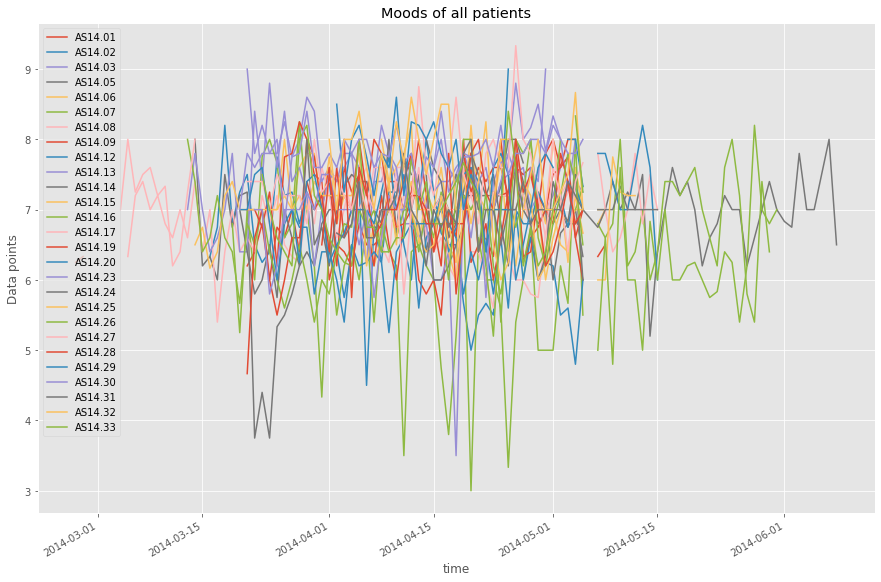

In [18]:
# visualized moods of all patients over the time
plt.rcParams["figure.figsize"] = [15,10]
for patient in prodataset.index.levels[0]:
    prodataset.loc[patient]['mood'].plot(label=patient, title="Moods of all patients", ylabel="Data points")
plt.legend();

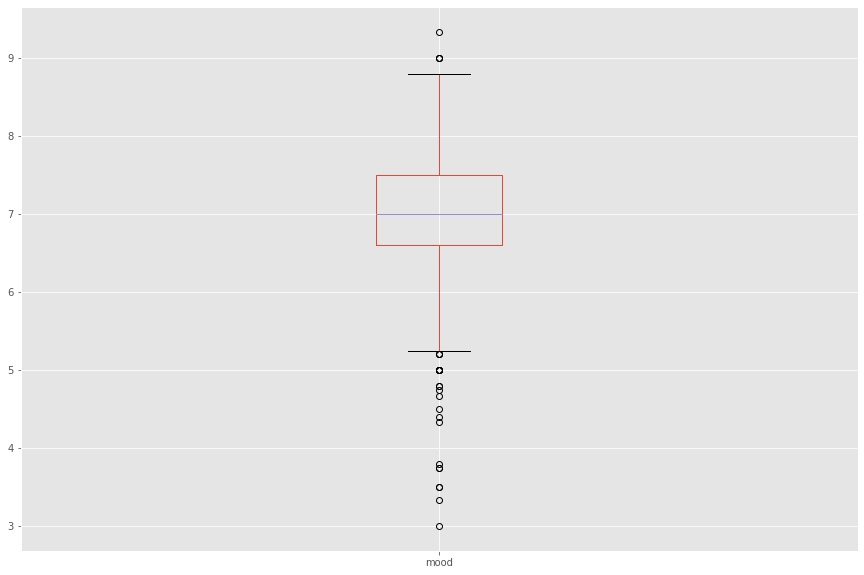

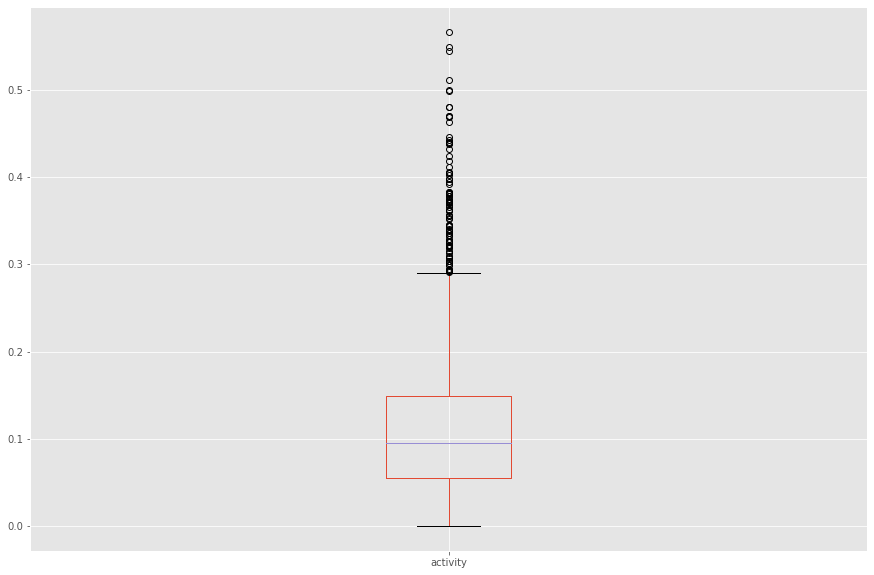

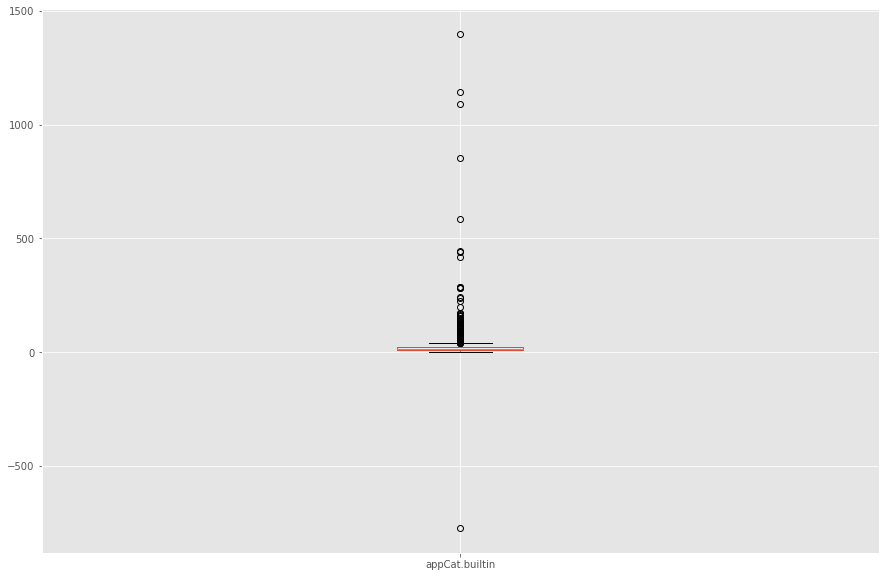

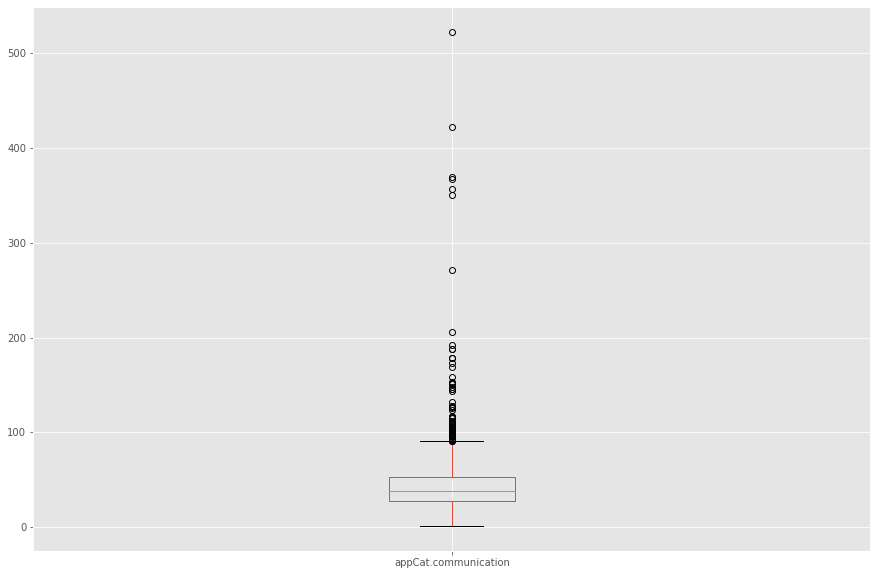

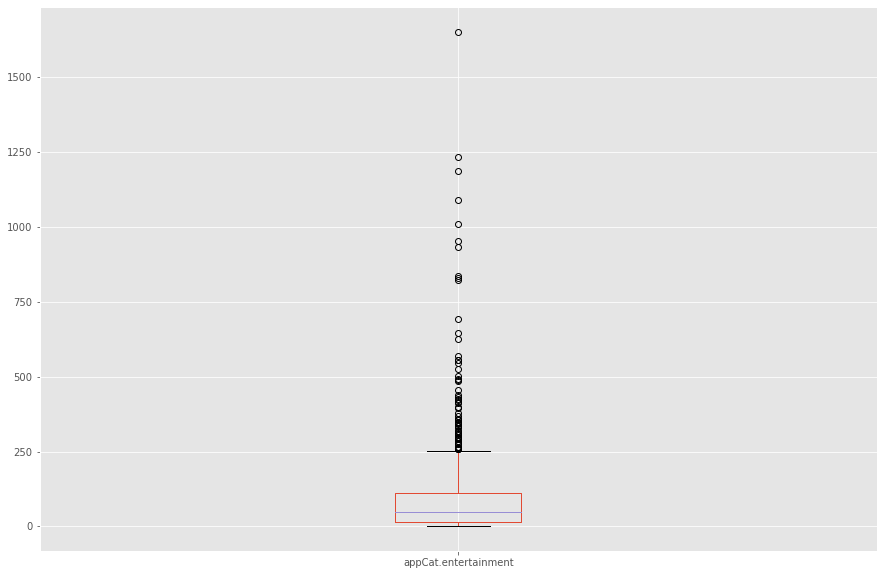

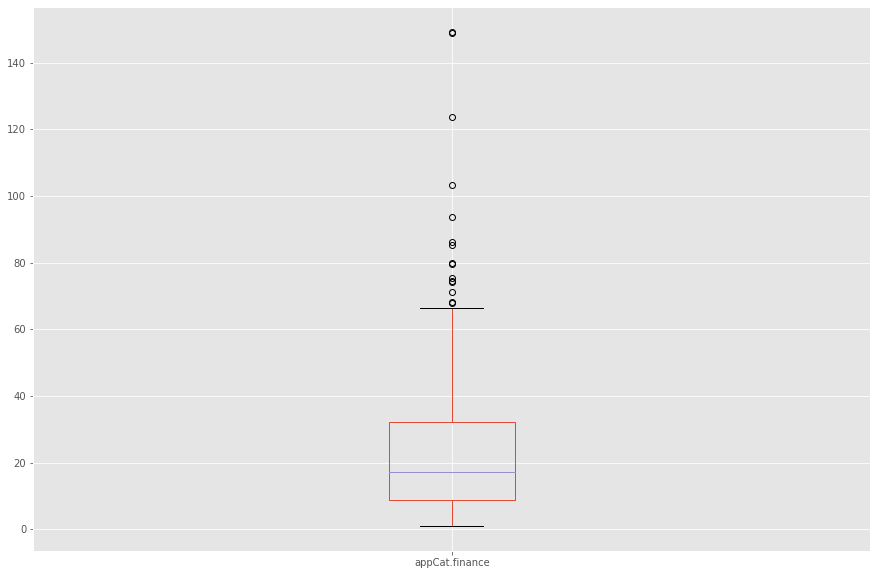

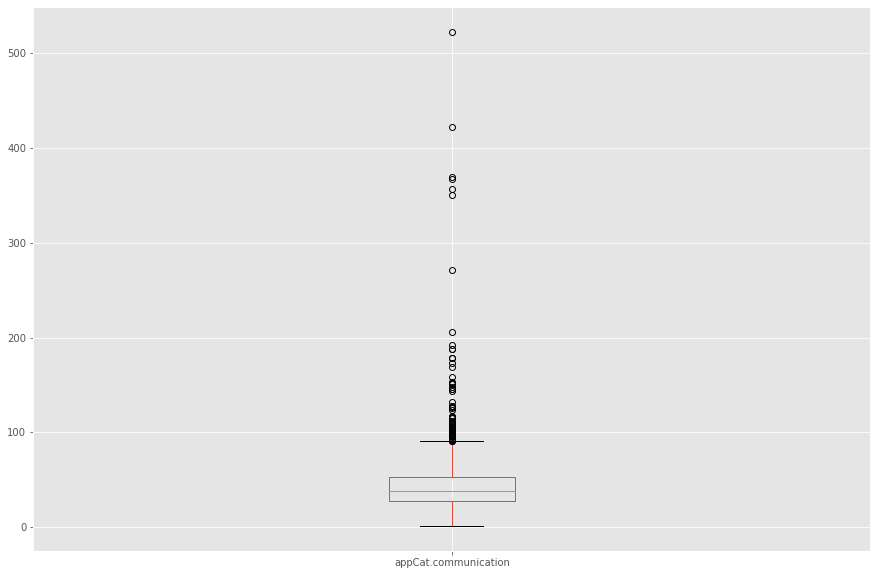

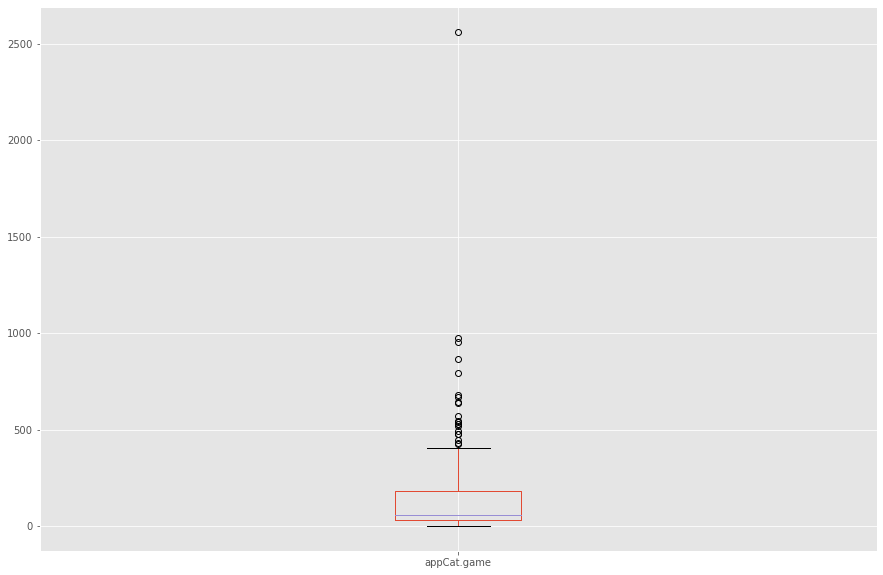

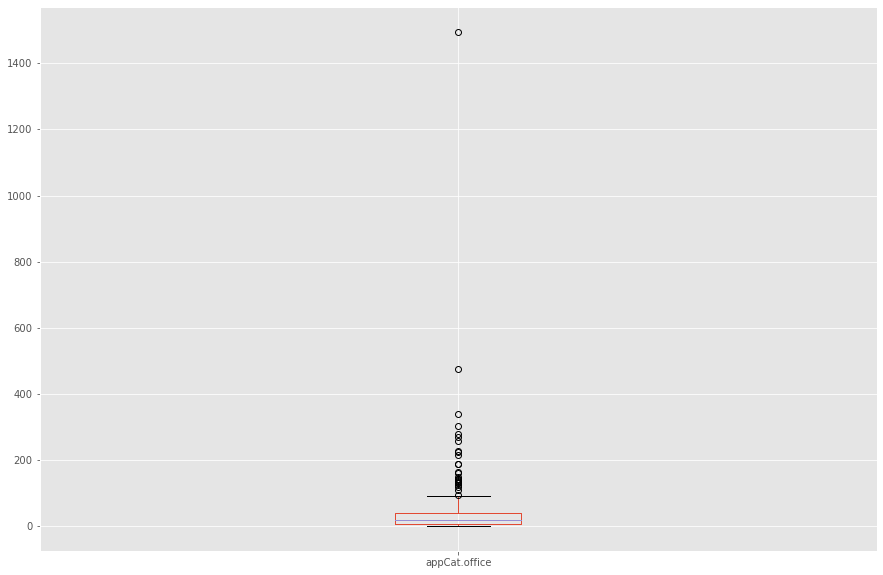

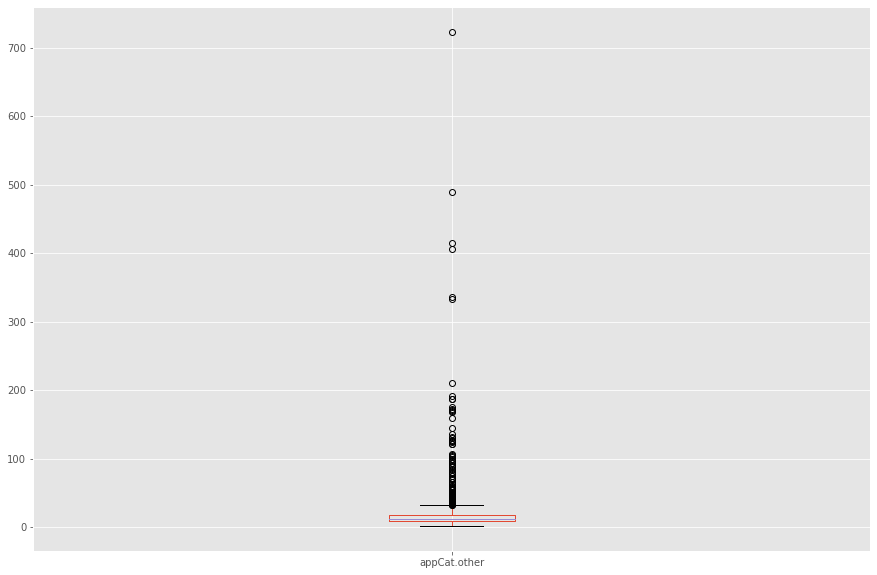

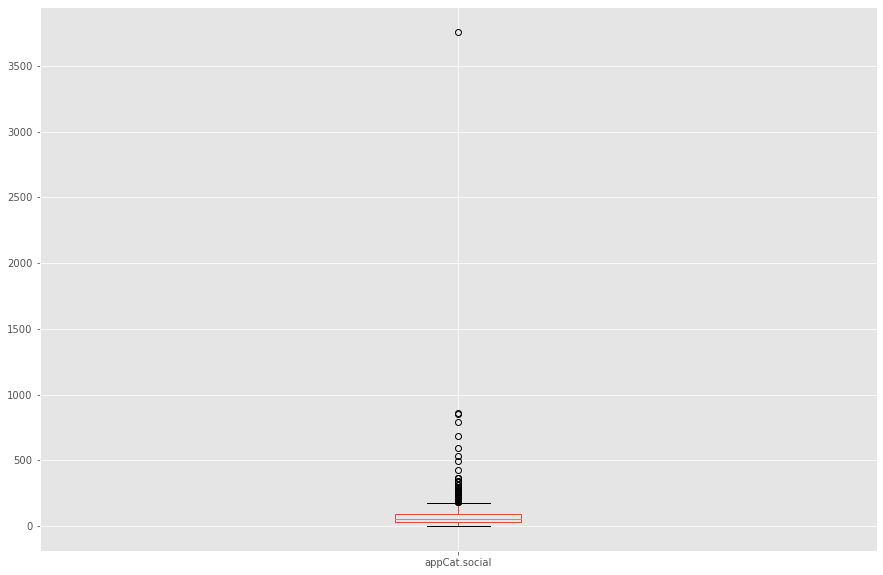

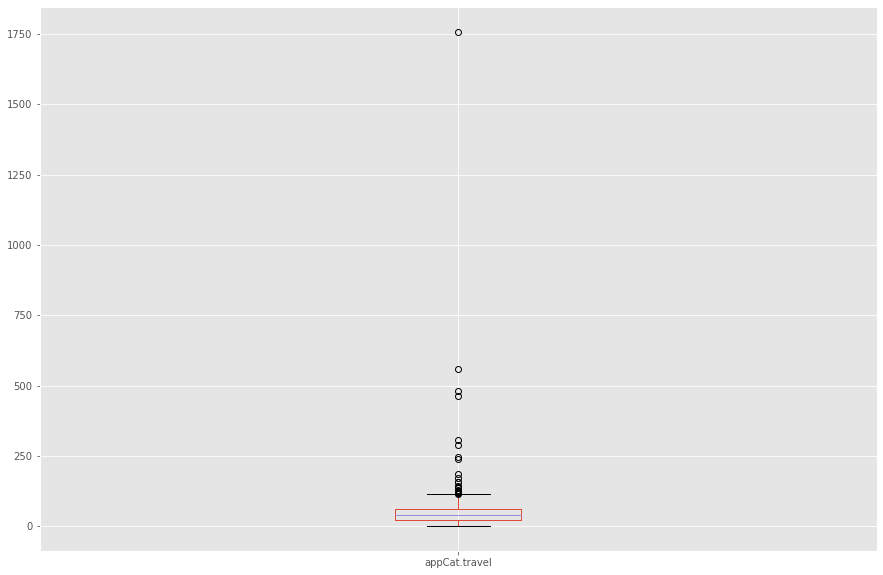

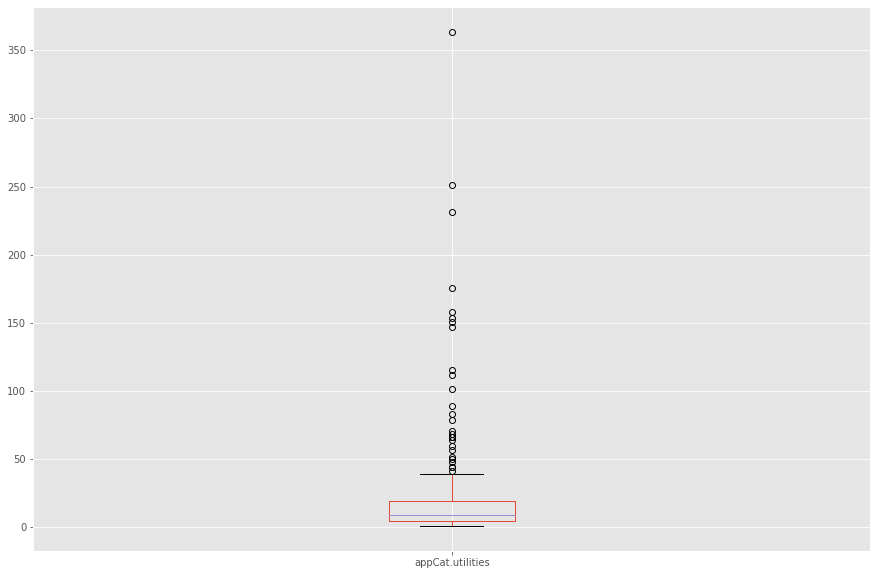

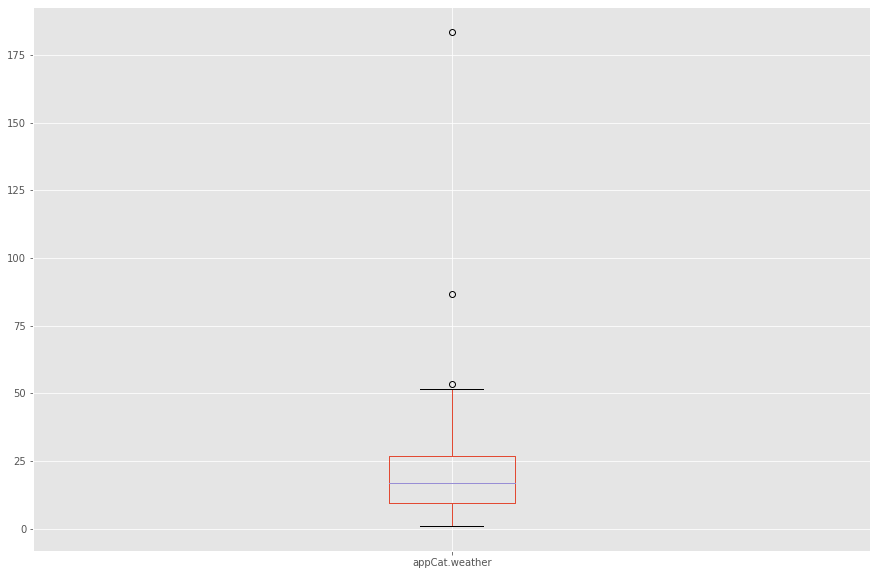

In [23]:
#Checking for outliers, If there are a lot of outliers we can't replace NaN with mean, but we use Median.

prodataset.boxplot(column=['mood'])
plt.show() #mean

prodataset.boxplot(column=['activity'])
plt.show() #median

prodataset.boxplot(column=['appCat.builtin'])
plt.show() #median

prodataset.boxplot(column=['appCat.communication'])
plt.show() #median

prodataset.boxplot(column=['appCat.entertainment'])
plt.show() #median

prodataset.boxplot(column=['appCat.finance'])
plt.show() #median

prodataset.boxplot(column=['appCat.communication'])
plt.show() #median

prodataset.boxplot(column=['appCat.game'])
plt.show() #median

prodataset.boxplot(column=['appCat.office'])
plt.show() #median

prodataset.boxplot(column=['appCat.other'])
plt.show() #median

prodataset.boxplot(column=['appCat.social'])
plt.show() #median

prodataset.boxplot(column=['appCat.travel'])
plt.show() #median

prodataset.boxplot(column=['appCat.utilities'])
plt.show() #median

prodataset.boxplot(column=['appCat.weather'])
plt.show() #mean

In [24]:
#Calculate mood and medians
mood_Mean = prodataset["mood"].mean()
activity_median = prodataset["activity"].median()
built_median = prodataset["appCat.builtin"].median()
comm_median = prodataset["appCat.communication"].median()
finance_median = prodataset["appCat.finance"].median()
ent_median = prodataset["appCat.entertainment"].median()
game_median = prodataset["appCat.game"].median()
office_median = prodataset["appCat.office"].median()
other_median = prodataset["appCat.other"].median()
social_median = prodataset["appCat.social"].median()
travel_median = prodataset["appCat.travel"].median()
utilities_median = prodataset["appCat.utilities"].median()
weather_median = prodataset["appCat.weather"].median()
arousal_mean = prodataset["circumplex.arousal"].mean()
valence_mean = prodataset["circumplex.valence"].mean()
uknown_median = prodataset["appCat.unknown"].median()
screen_median = prodataset["screen"].median()
sms_mean = prodataset["sms"].mean()
call_mean = prodataset["call"].mean()
#Replacing NULL values 
prodataset["mood"].replace(np.nan,mood_Mean,inplace=True)
prodataset["activity"].replace(np.nan,activity_median,inplace=True)
prodataset["appCat.builtin"].replace(np.nan,built_median,inplace=True)
prodataset["appCat.communication"].replace(np.nan,comm_median,inplace=True)
prodataset["appCat.entertainment"].replace(np.nan,ent_median,inplace=True)
prodataset["appCat.game"].replace(np.nan,game_median,inplace=True)
prodataset["appCat.office"].replace(np.nan,office_median,inplace=True)
prodataset["appCat.travel"].replace(np.nan,travel_median,inplace=True)
prodataset["appCat.other"].replace(np.nan,other_median,inplace=True)
prodataset["appCat.social"].replace(np.nan,social_median,inplace=True)
prodataset["appCat.utilities"].replace(np.nan,utilities_median,inplace=True)
prodataset["appCat.weather"].replace(np.nan,weather_median,inplace=True)
prodataset["circumplex.arousal"].replace(np.nan,arousal_mean,inplace=True)
prodataset["circumplex.valence"].replace(np.nan,valence_mean,inplace=True)
prodataset["appCat.finance"].replace(np.nan,finance_median,inplace=True)
prodataset["appCat.unknown"].replace(np.nan,uknown_median,inplace=True)
prodataset["call"].replace(np.nan,call_mean,inplace=True)
prodataset["sms"].replace(np.nan,sms_mean,inplace=True)
prodataset["screen"].replace(np.nan,screen_median,inplace=True)

In [31]:
prodataset.to_csv("dataset_clean.csv")

array([<AxesSubplot:xlabel='id,time'>, <AxesSubplot:xlabel='id,time'>,
       <AxesSubplot:xlabel='id,time'>, <AxesSubplot:xlabel='id,time'>,
       <AxesSubplot:xlabel='id,time'>, <AxesSubplot:xlabel='id,time'>,
       <AxesSubplot:xlabel='id,time'>, <AxesSubplot:xlabel='id,time'>,
       <AxesSubplot:xlabel='id,time'>, <AxesSubplot:xlabel='id,time'>,
       <AxesSubplot:xlabel='id,time'>, <AxesSubplot:xlabel='id,time'>,
       <AxesSubplot:xlabel='id,time'>, <AxesSubplot:xlabel='id,time'>,
       <AxesSubplot:xlabel='id,time'>, <AxesSubplot:xlabel='id,time'>,
       <AxesSubplot:xlabel='id,time'>, <AxesSubplot:xlabel='id,time'>,
       <AxesSubplot:xlabel='id,time'>], dtype=object)

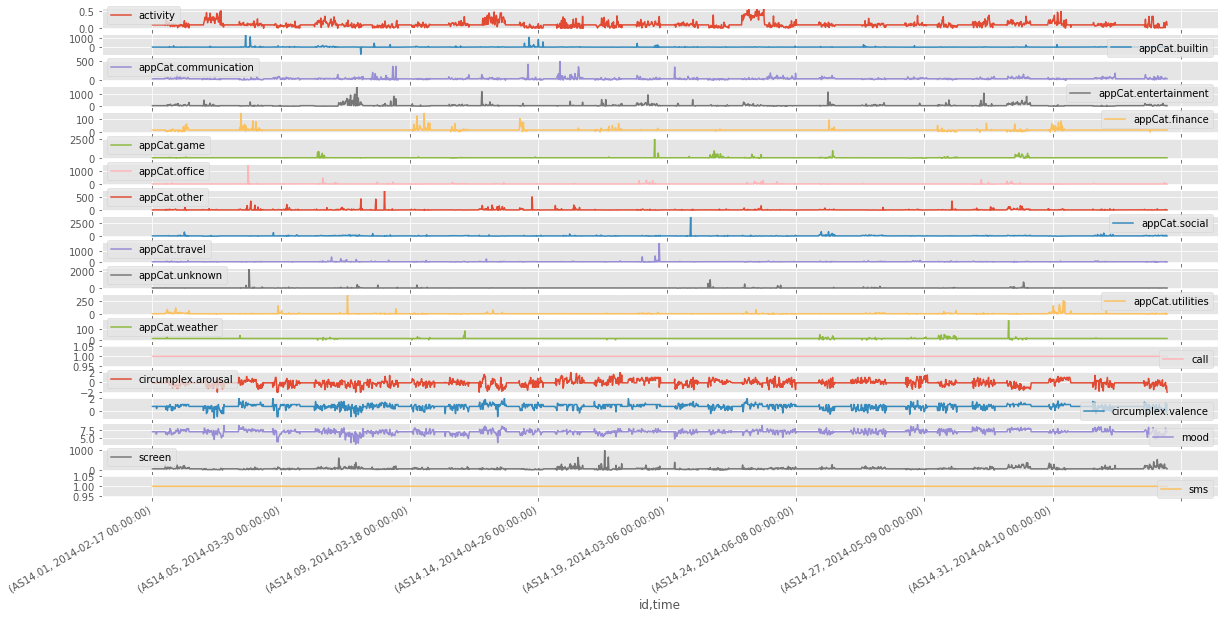

In [32]:
prodataset.plot(subplots=True, figsize=(30,20))